# Overview of the routines in `biosspheres.quadratures`

In [1]:
import biosspheres.quadratures.sphere as quadratures

This module has the implementation of functions that return
- Points and weights for doing the Gauss-Legendre quadrature with a composite trapezoidal quadrature rule on the surface of a sphere. See `sphere.gauss_legendre_trapezoidal_2d`, `sphere.gauss_legendre_trapezoidal_1d`.
- Evaluation of real and complex spherical harmonics in the points of the Gauss-Legendre and composite trapezoidal quadrature. See `sphere.gauss_legendre_trapezoidal_real_sh_mapping_2d`, `sphere.gauss_legendre_trapezoidal_complex_sh_mapping_2d`.
- Arrays for implementing a slow spherical harmonic transform (real or complex) on the surface of a sphere. See `sphere.real_spherical_harmonic_transform_1d`, `sphere.complex_spherical_harmonic_transform_1d`.
- Translations from a coordinate system to another. See `sphere.from_sphere_s_cartesian_to_j_spherical_2d`, `sphere.from_sphere_s_cartesian_to_j_spherical_1d`, `sphere.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d`, `sphere.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

## Preliminaries

### Spherical coordinate system

A vector is written as $\mathbf{r}=\left(r,\varphi,\theta\right)^t$, with $r \in [0,\infty)$, $\varphi \in [0,2\pi)$ and $\theta \in [0,\pi]$, which in Cartesian coordinates is equivalent to $\mathbf{r}=r\left(\sin \theta \cos \varphi,\sin \theta \sin \varphi,\cos \theta\right)^t$. The unitary vectors of the spherical coordinate system can be written in Cartesian coordinates as
$$\begin{align*}
    &\widehat{\mathbf{e}}_r= (\sin \theta \cos \varphi , \sin \theta \sin \varphi , \cos \theta )^t, \\
    &\widehat{\mathbf{e}}_\theta=(\cos \theta \cos \varphi , \cos \theta \sin \varphi , -\sin \theta  )^t, \\
    &\widehat{\mathbf{e}}_{\varphi}=(-\sin \varphi , \cos \varphi , 0 )^t.
\end{align*}$$

The gradient operator in spherical coordinates:
$$\begin{align*}
    \nabla f&=\frac{\partial f}{\partial r} \widehat{\mathbf{e}}_r+\frac{1}{r} \frac{\partial f}{\partial \theta} \widehat{\mathbf{e}}_\theta+\frac{1}{r \sin \theta} \frac{\partial f}{\partial \varphi} \widehat{\mathbf{e}}_{\varphi}
\end{align*}$$

### Spherical harmonics

#### Associated Legendre functions

$P_l^m$ are the associated Legendre functions of degree $l$ and  order $m$ defined as:
$$P_{l}^m\left(x\right) := (-1)^m \left( 1- x^2\right)^{\frac{m}{2}} \frac{d^m}{dx^m}P_l(x), \quad P_{l}\left(x\right) := \frac{1}{2^ll!}\frac{d^l}{dx^l}(x^2-1)^l.$$

Here, the term $(-1)^m$ is the Condon-Shortley phase factor.

#### Real spherical harmonics

Real spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$\begin{align}
		 Y_{l,m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0}) \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \cos m \varphi ,\\
		Y_{l,-m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0})\frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \sin m \varphi ,
\end{align}$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise.

#### Complex spherical harmonics

Complex spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$Y_{l,m}\left(\theta,\varphi\right) := \sqrt{ \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\left(\theta\right)\right) e^{i m \varphi},$$
$$Y_{l,-m}\left(\theta,\varphi\right) := (-1)^m\overline{Y}_{l,m}\left(\theta,\varphi\right),$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise.

### Reference systems in a geometry with $N$ spheres

$N$ disjoint spheres in $\mathbb{R}^3$:
- Position vectors of the sphere centers: $\mathbf{p_j} \in \mathbb{R}^3$, with $j \in \{1,...,N\}$.  
- Radii: $\tilde{r}_j\in \mathbb{R}^+$, with $j \in \{1,...,N\}$.
- Interior of sphere $j$: $\Omega_j:=\{ \mathbf{x} \in \mathbb{R}^3:||\mathbf{x}-\mathbf{p_j}||_2<\tilde{r}_j \}$.
- Boundary of sphere $j$: $\Gamma_j:=\partial \Omega_j$.
- Exterior medium, $\Omega_0$: defined as $\mathbb{R}^3$ without the spheres and their boundaries.

Let be $j\in \{1,...,N\}$. We define the reference system $j$ as the one centered at $\mathbf{p_j}$ with the same orientation that the reference system centered in the origin.

Suppose that we have a vector written in cartesian coordinates of the reference system $s$ ($s$ an integer indicating the origin of the coordinate system being the same than the position of the center of the sphere $s$), we will call it $\mathbf{x_s} = (x_s, y_s, z_s)$. We want to write this vector in the cartesian coordinates of the reference system $j$, for this we can write
$$\begin{align}
x_j = x_s + (\mathbf{p_s - p_j})_x,\\
y_j = y_s + (\mathbf{p_s - p_j})_y,\\
z_j = z_s + (\mathbf{p_s - p_j})_z.\\
\end{align}$$

## `sphere.gauss_legendre_trapezoidal_2d`

This function is for obtaining the quadratures points to approximate numerically the integral in a surface of a sphere. In this case they are given in a two dimensional array (three dimensional if we add the dimension needed to represent a vector). It returns the weights and vectors for the Gauss-Legendre and
composite  trapezoidal quadrature rule.

### Docstring and some comments

In [3]:
print(quadratures.gauss_legendre_trapezoidal_2d.__doc__)


    It returns the weights and vectors for the Gauss-Legendre quadrature
    rule and a composite trapezoidal quadrature rule to approximate
    numerically the integral in a surface of a sphere.

    Notes
    -----
    Gauss-legendre quadrature in theta. This one uses the package
    pyshtools for obtaining the points and weights.
    Integral on theta are (big_l_c + 1) quadrature points.
    The weights returned correspond to the integral on this variable.

    Composite trapezoidal rule in phi.
    Integral on phi are (2 * big_l_c + 1) quadrature points.
    This function does not return any weight for the phi variable,
    because it is a trapezoidal rule equally spaced.
    The integral in this variable can be solved using the fast fourier
    transform.

    Without considering errors produced by the approximation by finite
    numbers, the quadrature must be exact for functions consisting in
    polynomials of big_l_c degree times an exponential power to (m times
    i), with 

We use the points used by the library SHTOOLS to be able to use fast spherical harmonic transform that the library provides. See [Grid formats shtools](https://shtools.github.io/SHTOOLS/grid-formats.html).

This function needs only one parameter `big_l_c`. Without considering errors produced by the approximation by finite numbers, the quadrature must be exact for functions consisting in polynomials of `big_l_c` degree times $e^{im}$, with $|m| <= $ `big_l_c`.

See the section notes of the dosctring for more details.

### Example

In [4]:
big_l_c = 15
quantity_theta_points, quantity_phi_points, weights, pre_vector = quadratures.gauss_legendre_trapezoidal_2d(big_l_c)

In [5]:
print('big_l_c : ', big_l_c) 
print('Quantity of points for the quadrature in the theta variable: ', quantity_theta_points)
print('Quantity of points for the quadrature in the phi variable:   ', quantity_phi_points)

big_l_c :  15
Quantity of points for the quadrature in the theta variable:  16
Quantity of points for the quadrature in the phi variable:    31


In [6]:
print('Gauss-Legendre Weights:\n', weights)

Gauss-Legendre Weights:
 [0.02715246 0.06225352 0.09515851 0.12462897 0.14959599 0.16915652
 0.18260342 0.18945061 0.18945061 0.18260342 0.16915652 0.14959599
 0.12462897 0.09515851 0.06225352 0.02715246]


Quadrature points are given in the variable `pre_vector`:

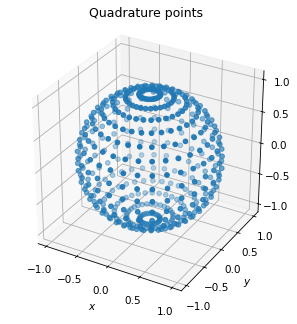

In [7]:
vector = pre_vector
fig = plt.figure(figsize=(4,4),dpi=75., layout='constrained')
ax_1 = fig.add_subplot(111, projection='3d')
ax_1.scatter3D(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
)
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
ax_1.set_title('Quadrature points')
plt.show()

## `sphere.gauss_legendre_trapezoidal_1d`

This function is almost the same than `gauss_legendre_trapezoidal_2d`, with the difference that the vectors are given in an array of one dimension (two if we add the dimension needed for represent a vector).

### Docstring and some comments

In [8]:
print(quadratures.gauss_legendre_trapezoidal_1d.__doc__)


    It returns the weights and vectors for the Gauss-Legendre quadrature
    rule and a composite trapezoidal quadrature rule to approximate
    numerically the integral in a surface of a sphere.

    Notes
    -----
    Gauss-legendre quadrature in theta. This one uses the package
    pyshtools for obtaining the points and weights.
    Integral on theta are (big_l_c + 1) quadrature points.

    Composite trapezoidal rule in phi.
    Integral on phi are (2 * big_l_c + 1) quadrature points.

    The weight for the variable phi (which is the same for
    all points) is considered in the return array total_weights along
    with the weights for the theta variable and the jacobian of the
    surface integral.
    The ordering of the arrays given by this function is not suited for
    fast fourier transform algorithms. The returns of this function is
    for using the simpler algorithm for obtaining integrals on the
    sphere.

    Without considering errors produced by the approximation 

See the section Notes of the docstring for details related to the weights that this function returns, and for more details.

The returns of this function is for using the simpler algorithm for obtaining integrals on the sphere.

### Example

In [9]:
big_l_c = 15
final_length, total_weights, pre_vector = quadratures.gauss_legendre_trapezoidal_1d(big_l_c)

In [10]:
print('big_l_c : ', big_l_c) 
print('Quantity of points for the quadrature: ', final_length)

big_l_c :  15
Quantity of points for the quadrature:  496


In `pre_vector` the quadrature points are saved.

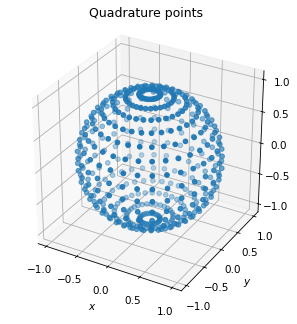

In [11]:
vector = pre_vector
fig = plt.figure(figsize=(4,4),dpi=75., layout='constrained')
ax_1 = fig.add_subplot(111, projection='3d')
ax_1.scatter3D(
    vector[0, :],
    vector[1, :],
    vector[2, :],
)
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
ax_1.set_title('Quadrature points')
plt.show()

## `sphere.gauss_legendre_trapezoidal_real_sh_mapping_2d`

This functions does the same than the function `gauss_legendre_trapezoidal_2d` and it also returns the evaluation of the real spherical harmonics in those points.

### Docstring and some comments

In [12]:
print(quadratures.gauss_legendre_trapezoidal_real_sh_mapping_2d.__doc__)


    This function is for obtaining the quadratures points to
    approximate numerically the integral in a surface of a sphere, and
    it also returns the evaluation of the real spherical harmonics in
    those points.
    It returns the weights and vectors for the Gauss-Legendre and
    composite trapezoidal quadrature rule. The real spherical
    harmonics evaluated are of degree l and order m, with l <= big_l.
    See the shape of the returns.

    Notes
    -----
    Gauss-legendre quadrature in theta. This one uses the package
    pyshtools.
    Composite trapezoidal rule in phi.
    Integral on theta are (big_l_c + 1) quadrature points.
    Integral on phi are (2 * big_l_c + 1) quadrature points.
    Without considering errors produced by the approximation by finite
    numbers, the quadrature must be exact for functions consisting in
    polynomials of big_l_c degree times an exponential power to (m times
    i), with |m| <= big_l_c.
    Legendre's functions are computed used 

Now, the variable `big_l` indicates the maximum degree of spherical harmonics to be evaluated in the quadrature points.

Also, there are auxiliary parameters needed, which need to be obtained using `biosspheres.miscella.auxindexes.pes_y_kus(big_l)`. Notice that they depend on `big_l`.

### Example

In [13]:
big_l = 1

Auxiliar parameters needed:

In [14]:
from biosspheres.miscella.auxindexes import pes_y_kus
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = pes_y_kus(big_l)

In [15]:
big_l_c = 40
quantity_theta_points, quantity_phi_points, weights, pre_vector, spherical_harmonics = quadratures.gauss_legendre_trapezoidal_real_sh_mapping_2d(big_l, big_l_c, pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)

Plottings of the spherical harmonics:

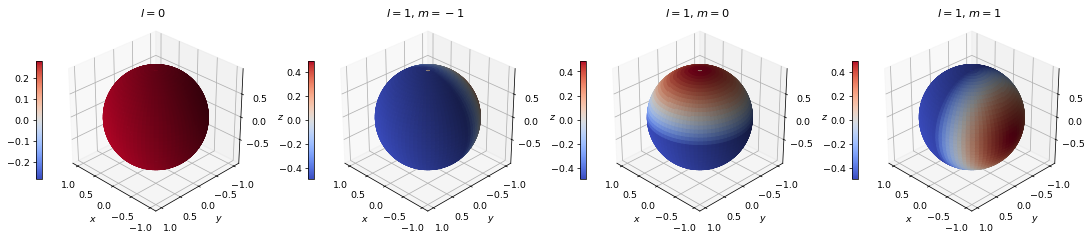

In [16]:
vector = pre_vector
fig = plt.figure(figsize=plt.figaspect(0.20), dpi=68., layout='constrained')
ax_1 = fig.add_subplot(141, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[0, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1,
    cstride=1,
    facecolors=cm.coolwarm(spherical_harmonics[0, :, :] / surface_max),
)
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(
    cm.ScalarMappable(
        norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm
    ),
    ax=ax_1,
    shrink=0.6,
    orientation='vertical',
    location='left',
)

ax_1 = fig.add_subplot(142, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[1, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1,
    cstride=1,
    facecolors=cm.coolwarm(spherical_harmonics[1, :, :] / surface_max),
)
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = -1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(
    cm.ScalarMappable(
        norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm
    ),
    ax=ax_1,
    shrink=0.6,
    orientation='vertical',
    location='left',
)

ax_1 = fig.add_subplot(143, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[2, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1,
    cstride=1,
    facecolors=cm.coolwarm(spherical_harmonics[2, :, :] / surface_max),
)
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(
    cm.ScalarMappable(
        norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm
    ),
    ax=ax_1,
    shrink=0.6,
    orientation='vertical',
    location='left'
)


ax_1 = fig.add_subplot(144, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[3, :, :]))
ax_1.view_init(30, 135, 0)
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1,
    cstride=1,
    facecolors=cm.coolwarm(spherical_harmonics[3, :, :] / surface_max),
)
ax_1.set_title('$l = 1$, $m = 1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(
    cm.ScalarMappable(
        norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm
    ),
    ax=ax_1,
    shrink=0.6,
    orientation='vertical',
    location='left',
)
plt.show()

## `sphere.gauss_legendre_trapezoidal_complex_sh_mapping_2d`

This functions does the same than `gauss_legendre_trapezoidal_complex_sh_mapping_2d`, with the difference that this time the complex spherical harmonics are evaluated.

### Docstring and comments

In [17]:
print(quadratures.gauss_legendre_trapezoidal_complex_sh_mapping_2d.__doc__)


    This function is for obtaining the quadratures points to
    approximate numerically the integral in a surface of a sphere, and
    it also returns the evaluation of the complex spherical harmonics in
    those points.
    It returns the weights and vectors for the Gauss-Legendre and
    composite trapezoidal quadrature rule. The complex spherical
    harmonics evaluated are of degree l and order m, with l <= big_l.
    See the shape of the returns.

    Notes
    -----
    Gauss-legendre quadrature in theta. This one uses the package
    pyshtools.
    Composite trapezoidal rule in phi.
    Integral on theta are (big_l_c + 1) quadrature points.
    Integral on phi are (2 * big_l_c + 1) quadrature points.
    Without considering errors produced by the approximation by finite
    numbers, the quadrature must be exact for functions consisting in
    polynomials of big_l_c degree times an exponential power to (m times
    i), with |m| <= big_l_c.
    Legendre's functions are computed

### Example

In [18]:
big_l_c = 40
big_l = 1

Auxiliary parameters:

In [19]:
from biosspheres.miscella.auxindexes import pes_y_kus
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = pes_y_kus(big_l)

In [20]:
quantity_theta_points, quantity_phi_points, weights, pre_vector, spherical_harmonics = quadratures.gauss_legendre_trapezoidal_complex_sh_mapping_2d(big_l, big_l_c, pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)

Plotting of the real part of the spherical harmonics.

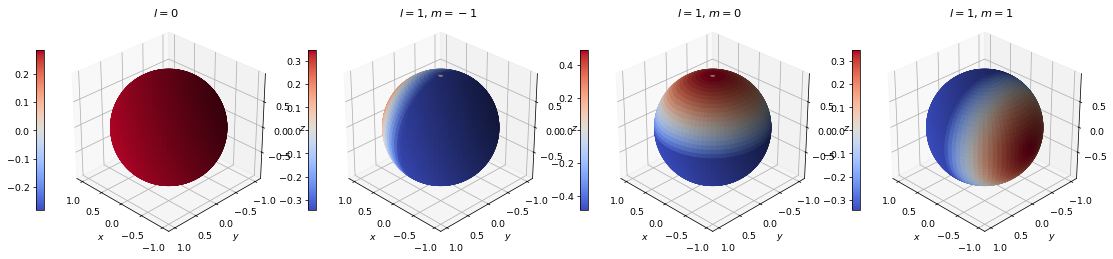

In [21]:
fig = plt.figure(figsize=plt.figaspect(0.25), dpi=68., layout='constrained')
ax_1 = fig.add_subplot(141, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[0, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1,
    cstride=1,
    facecolors=cm.coolwarm(
        np.real(spherical_harmonics[0, :, :]) / surface_max
    ),
)
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(
    cm.ScalarMappable(
        norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm
    ),
    ax=ax_1,
    shrink=0.6,
    orientation='vertical',
    location='left',
)

ax_1 = fig.add_subplot(142, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[1, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1,
    cstride=1,
    facecolors=cm.coolwarm(
        np.real(spherical_harmonics[1, :, :]) / surface_max
    ),
)
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = -1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(
    cm.ScalarMappable(
        norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm
    ),
    ax=ax_1,
    shrink=0.6,
    orientation='vertical',
    location='left',
)

ax_1 = fig.add_subplot(143, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[2, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, 
    cstride=1,
    facecolors=cm.coolwarm(
        np.real(spherical_harmonics[2, :, :]) / surface_max
    ),
)
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')

ax_1 = fig.add_subplot(144, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[3, :, :]))
ax_1.view_init(30, 135, 0)
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(np.real(spherical_harmonics[3, :, :])/surface_max))
ax_1.set_title('$l = 1$, $m = 1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')
plt.show()

Plotting of the imaginary part of the spherical harmonics:

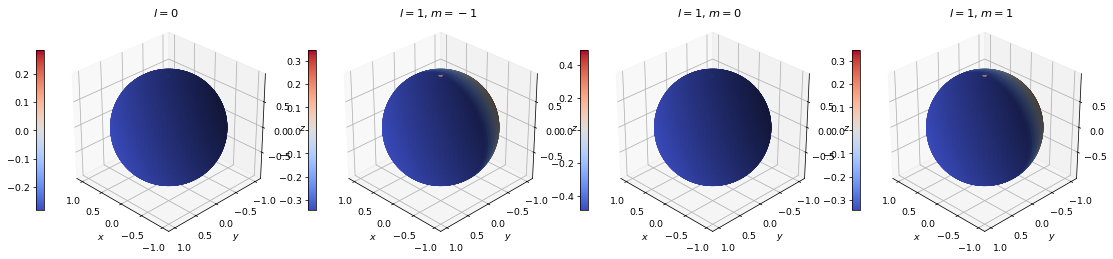

In [22]:
fig = plt.figure(figsize=plt.figaspect(0.25), dpi=68., layout='constrained')
ax_1 = fig.add_subplot(141, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[0, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(np.imag(spherical_harmonics[0, :, :])/surface_max))
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')

ax_1 = fig.add_subplot(142, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[1, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(np.imag(spherical_harmonics[1, :, :])/surface_max))
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = -1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')

ax_1 = fig.add_subplot(143, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[2, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(np.imag(spherical_harmonics[2, :, :])/surface_max))
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')

ax_1 = fig.add_subplot(144, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[3, :, :]))
ax_1.view_init(30, 135, 0)
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(np.imag(spherical_harmonics[3, :, :])/surface_max))
ax_1.set_title('$l = 1$, $m = 1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')
plt.show()

## `sphere.real_spherical_harmonic_transform_1d`

It returns the same than `sphere.gauss_legendre_trapezoidal_1d` and a vector that can be used to calculate the real spherical harmonic transform on the surface of a sphere of radius equal to one.

### Docstring and some comments

In [23]:
print(quadratures.real_spherical_harmonic_transform_1d.__doc__)


    It returns the vectors for the Gauss-Legendre and trapezoidal
    quadrature rule for computing a numerical integral in the surface
    of a sphere. It also returns a vector that can be used to calculate
    the real spherical harmonic transform on the surface of a sphere of
    radius equal to one.

    The use of the results of this routine is for SLOW routines, because
    the vector used for the spherical harmonic transform does not have
    any performance improvements.

    Notes
    -----
    Gauss-legendre quadrature in theta. This one uses the package
    pyshtools.
    Composite trapezoidal rule in phi.
    Integral on theta are (big_l_c + 1) quadrature points.
    Integral on phi are (2 * big_l_c + 1) quadrature points.

    Parameters
    ----------
    big_l : int
        >= 0.
    big_l_c: int
        >= 0. It's the parameter used to compute the points of the
        quadrature.

    Returns
    -------
    final_length : int
        how many points for the surface i

### Example

In [24]:
big_l = 1
big_l_c = 40
final_length, pre_vector, transform = quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)

Now we are going to check the orthonormality of the spherical harmonics that are being used.

We obtain the spherical harmonics evaluated in the quadrature points:

In [25]:
from biosspheres.miscella.auxindexes import pes_y_kus
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = pes_y_kus(big_l)
quantity_theta_points, quantity_phi_points, weights, pre_vector, spherical_harmonics = (
    quadratures.gauss_legendre_trapezoidal_real_sh_mapping_2d(
        big_l, big_l_c, pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q))

Check of the property:

In [26]:
integral = np.sum(spherical_harmonics[0, :, :].flatten('F') * transform[0, :])
print(integral)
integral = np.sum(spherical_harmonics[1, :, :].flatten('F') * transform[1, :])
print(integral)
integral = np.sum(spherical_harmonics[2, :, :].flatten('F') * transform[2, :])
print(integral)
integral = np.sum(spherical_harmonics[3, :, :].flatten('F') * transform[3, :])
print(integral)

0.999999999999999
0.9999999999999997
0.9999999999999978
0.9999999999999997


Which is near to one, the expected result.

## `sphere.complex_spherical_harmonic_transform_1d`

It returns the same than `sphere.gauss_legendre_trapezoidal_1d` and a vector that can be used to calculate the complex spherical harmonic transform on the surface of a sphere of radius equal to one.

### Docstring and some comments

In [27]:
print(quadratures.complex_spherical_harmonic_transform_1d.__doc__)


    It returns the vectors for the Gauss-Legendre and trapezoidal
    quadrature rule for computing a numerical integral in the surface
    of a sphere. It also returns a vector that can be used to calculate
    the complex spherical harmonic transform on the surface of a sphere of
    radius equal to one.

    The use of the results of this routine is for SLOW routines, because
    the vector used for the spherical harmonic transform does not have
    any performance improvements.

    Notes
    -----
    Gauss-legendre quadrature in theta. This one uses the package
    pyshtools.
    Composite trapezoidal rule in phi.
    Integral on theta are (big_l_c + 1) quadrature points.
    Integral on phi are (2 * big_l_c + 1) quadrature points.

    Parameters
    ----------
    big_l : int
        >= 0.
    big_l_c: int
        >= 0. It's the parameter used to compute the points of the
        quadrature.

    Returns
    -------
    final_length : int
        how many points for the surfac

### Example

In [28]:
big_l_c = 15
big_l = 1
final_length, pre_vector, transform = quadratures.complex_spherical_harmonic_transform_1d(big_l, big_l_c)

In [29]:
from biosspheres.miscella.auxindexes import pes_y_kus
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = pes_y_kus(big_l)
(quantity_theta_points, quantity_phi_points, weights, pre_vector,
 spherical_harmonics) = (
    quadratures.gauss_legendre_trapezoidal_complex_sh_mapping_2d(
        big_l, big_l_c, pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q))

In [30]:
integral = np.sum(spherical_harmonics[0, :, :].flatten('F') * transform[0, :])
print(integral)
integral = np.sum(spherical_harmonics[1, :, :].flatten('F') * transform[1, :])
print(integral)
integral = np.sum(spherical_harmonics[2, :, :].flatten('F') * transform[2, :])
print(integral)
integral = np.sum(spherical_harmonics[3, :, :].flatten('F') * transform[3, :])
print(integral)

(0.9999999999999977+0j)
(0.9999999999999996-4.205982639596493e-18j)
(0.9999999999999934+0j)
(0.9999999999999996-1.8731017686501848e-18j)


## `sphere.from_sphere_s_cartesian_to_j_spherical_2d`

Given points in the cartesian coordinate system $s$, this algorithm writes them in the spherical coordinate system $j$. See the following subsection for the format of the inputs.

### Docstring and some comments

In [31]:
print(quadratures.from_sphere_s_cartesian_to_j_spherical_2d.__doc__)


    Given points in the cartesian coordinate system "s", this algorithm
    writes them in the spherical coordinate system "j". The "j" has its
    center in a different point than the center of the coordinate system
    "s".

    Notes
    -----
    Input:
        x_s = r_s sin(theta) cos(varphi) ,
        y_s = r_s sin(theta) sin(varphi) ,
        z_s = r_s cos(theta)  ,
    To the cartesian coordinate system j:
        x_j = x_s + (p_s - p_j)_x ,
        y_j = y_s + (p_s - p_j)_y ,
        z_j = z_s + (p_s - p_j)_z ,
    To the spherical coordinate system j:
        r_j = sqrt{x^2_j + y^2_j + z^2_j} ,
        cos theta = r_j / z_j ,
        varphi = arctan2 (y_j / x_j)

    Parameters
    ----------
    r_s : float
        > 0, radius of the sphere s.
    p_j : np.ndarray
        of floats of dimension 1, length 3, represents the position
        vector of the center of the sphere j.
    p_s : np.ndarray
        of floats of dimension 1, length 3, represents the position
        ve

As long as the input points are given in the cartesian coordinate system $s$, the function will do what it is supposed to.

### Example

In [32]:
radio_1 = 1.2
radio_2 = 1.7

In [33]:
p_1 = np.asarray([2., 1., 2.5])
p_2 = -p_1

In [34]:
big_l_c = 4

In [35]:
quantity_theta_points, quantity_phi_points, weights, pre_vector = quadratures.gauss_legendre_trapezoidal_2d(big_l_c)

In [36]:
r_coord, phi_coord, cos_theta_coord = quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
    radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points, pre_vector)

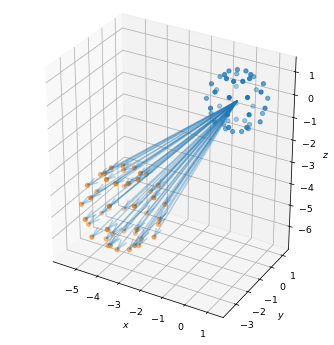

In [37]:
fig = plt.figure(figsize=plt.figaspect(1.), dpi=68., layout='constrained')
ax_1 = fig.add_subplot(111, projection='3d')
vector = radio_1 * pre_vector
ax_1.scatter3D(
    vector[0, :],
    vector[1, :],
    vector[2, :])
sin_theta = np.sqrt(1-cos_theta_coord**2)
ax_1.scatter3D(
    r_coord * sin_theta * np.cos(phi_coord),
    r_coord * sin_theta * np.sin(phi_coord),
    r_coord * cos_theta_coord)
for i in np.arange(0, quantity_theta_points):
    for j in np.arange(0, quantity_phi_points):
        ax_1.quiver(
            np.zeros_like(vector[0, i, j]),
            np.zeros_like(vector[0, i, j]),
            np.zeros_like(vector[0, i, j]),
            sin_theta[i, j] * np.cos(phi_coord[i, j]),
            sin_theta[i, j] * np.sin(phi_coord[i, j]),
            cos_theta_coord[i, j],
            pivot='tail', length=r_coord[i, j], arrow_length_ratio=0.0625, alpha=0.325)
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
plt.show()

## `sphere.from_sphere_s_cartesian_to_j_spherical_1d`

Same than `sphere.from_sphere_s_cartesian_to_j_spherical_2d`, but with different format input and output.

### Docstring and some comments

In [38]:
print(quadratures.from_sphere_s_cartesian_to_j_spherical_1d.__doc__)


    Given points in the cartesian coordinate system "s", this algorithm
    writes them in the spherical coordinate system "j". The "j" has its
    center in a different point than the center of the coordinate system
    "s".

    This one is for a slow routine.

    Notes
    -----
    put:
        x_s = r_s sin(theta) cos(varphi) ,
        y_s = r_s sin(theta) sin(varphi) ,
        z_s = r_s cos(theta)  ,
    To the cartesian coordinate system j:
        x_j = x_s + (p_s - p_j)_x ,
        y_j = y_s + (p_s - p_j)_y ,
        z_j = z_s + (p_s - p_j)_z ,
    To the spherical coordinate system j:
        r_j = sqrt{x^2_j + y^2_j + z^2_j} ,
        cos theta = r_j / z_j ,
        varphi = arctan2 (y_j / x_j)

    Parameters
    ----------
    r_s : float
        > 0, radius of the sphere s.
    p_j : np.ndarray
        of floats of dimension 1, length 3, represents the position
        vector of the center of the sphere j.
    p_s : np.ndarray
        of floats of dimension 1, length 3,

As long as the input points are given in the cartesian coordinate system $s$, the function will do what it is supposed to.

### Example

In [39]:
radio_1 = 1.2
radio_2 = 1.7

In [40]:
p_1 = np.asarray([2., 1., 2.5])
p_2 = -p_1

In [41]:
big_l_c = 3

In [42]:
final_length, total_weights, pre_vector = quadratures.gauss_legendre_trapezoidal_1d(big_l_c)

In [43]:
r_coord, phi_coord, cos_theta_coord = quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
    radio_2, p_1, p_2, final_length, pre_vector)

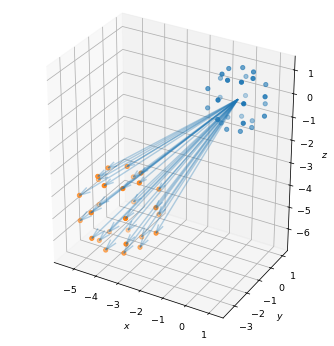

In [44]:
fig = plt.figure(figsize=plt.figaspect(1.), dpi=68., layout='constrained')
ax_1 = fig.add_subplot(111, projection='3d')
vector = radio_1 * pre_vector
ax_1.scatter3D(
    vector[0, :],
    vector[1, :],
    vector[2, :])
sin_theta = np.sqrt(1-cos_theta_coord**2)
ax_1.scatter3D(
    r_coord * sin_theta * np.cos(phi_coord),
    r_coord * sin_theta * np.sin(phi_coord),
    r_coord * cos_theta_coord)
for i in np.arange(0, final_length):
    ax_1.quiver(
        np.zeros_like(vector[0, i]),
        np.zeros_like(vector[0, i]),
        np.zeros_like(vector[0, i]),
        sin_theta[i] * np.cos(phi_coord[i]),
        sin_theta[i] * np.sin(phi_coord[i]),
        cos_theta_coord[i],
        pivot='tail', length=r_coord[i], arrow_length_ratio=0.0625, alpha=0.325)
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
plt.show()

## `sphere.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d`

Given points in the cartesian coordinate system $s$, this algorithm writes them in the spherical coordinate system $j$, and also gives  the dot product between the unitary vectors of the spherical system obtained times the normal of the unitary sphere. See the following subsection for the format of the inputs.

### Docstring and some comments

In [45]:
print(quadratures.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d.__doc__)


    Given points in the cartesian coordinate system "s", this algorithm
    writes them in the spherical coordinate system "j", and also gives
    the dot product between the unitary vectors of the spherical system
    obtained times the normal of the unitary sphere.
    The "j" has its center in a different point than the center of the
    coordinate system "s".

    Notes
    -----
    put:
        x_s = r_s sin(theta) cos(varphi) ,
        y_s = r_s sin(theta) sin(varphi) ,
        z_s = r_s cos(theta)  ,
    To the cartesian coordinate system j:
        x_j = x_s + (p_s - p_j)_x ,
        y_j = y_s + (p_s - p_j)_y ,
        z_j = z_s + (p_s - p_j)_z ,
    To the spherical coordinate system j:
        r_j = sqrt{x^2_j + y^2_j + z^2_j} ,
        cos theta = r_j / z_j ,
        varphi = arctan2 (y_j / x_j)
    Unitary vectors:
        hat{mathbf{e}}_r = sin(theta) cos(varphi) hat{mathbf{e}}_x
            + sin(theta) sin(varphi) hat{mathbf{e}}_y
            + cos(theta) hat{mathbf{e}

As long as the input points are given in the cartesian coordinate system $s$, the function will do what it is supposed to.

### Example

In [46]:
radio_1 = 1.2
radio_2 = 1.7

In [47]:
p_1 = np.asarray([2., 1., 2.5])
p_2 = -p_1

In [48]:
big_l_c = 30

In [49]:
quantity_theta_points, quantity_phi_points, weights, pre_vector = quadratures.gauss_legendre_trapezoidal_2d(big_l_c)

In [50]:
r_coord, phi_coord, cos_theta_coord, er_times_n, etheta_times_n, ephi_times_n = quadratures.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d(
    radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points, pre_vector)

Projections in the other sphere:

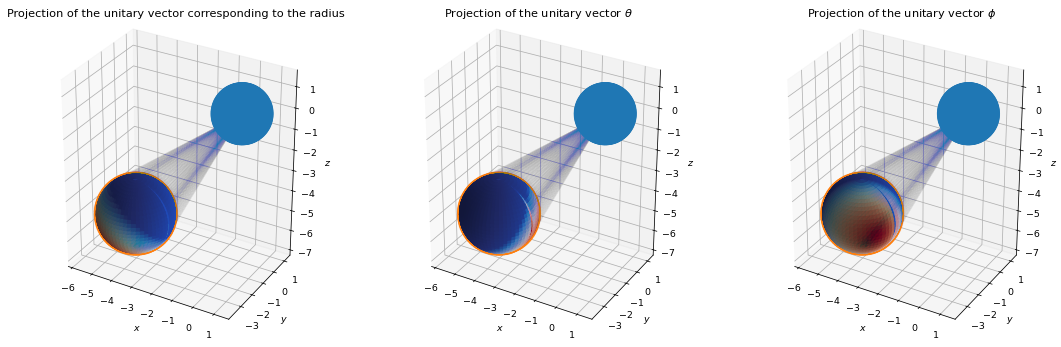

In [51]:
fig = plt.figure(figsize=plt.figaspect(.3), dpi=68., layout='constrained')
ax_1 = fig.add_subplot(131, projection='3d')
vector = radio_1 * pre_vector
ax_1.scatter3D(
    vector[0, :],
    vector[1, :],
    vector[2, :])
sin_theta = np.sqrt(1-cos_theta_coord**2)
ax_1.scatter3D(
    r_coord * sin_theta * np.cos(phi_coord),
    r_coord * sin_theta * np.sin(phi_coord),
    r_coord * cos_theta_coord)

for i in np.arange(0, quantity_theta_points):
    for j in np.arange(0, quantity_phi_points):
        ax_1.quiver(
            np.zeros_like(vector[0, i, j]),
            np.zeros_like(vector[0, i, j]),
            np.zeros_like(vector[0, i, j]),
            sin_theta[i, j] * np.cos(phi_coord[i, j]),
            sin_theta[i, j] * np.sin(phi_coord[i, j]),
            cos_theta_coord[i, j],
            pivot='tail', length=r_coord[i, j], arrow_length_ratio=0.0625, alpha=0.005)
ax_1.plot_surface(
    r_coord * sin_theta * np.cos(phi_coord),
    r_coord * sin_theta * np.sin(phi_coord),
    r_coord * cos_theta_coord,
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(er_times_n))
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
ax_1.set_title('Projection of the unitary vector corresponding to the radius')

ax_1 = fig.add_subplot(132, projection='3d')
vector = radio_1 * pre_vector
ax_1.scatter3D(
    vector[0, :],
    vector[1, :],
    vector[2, :])
sin_theta = np.sqrt(1-cos_theta_coord**2)
ax_1.scatter3D(
    r_coord * sin_theta * np.cos(phi_coord),
    r_coord * sin_theta * np.sin(phi_coord),
    r_coord * cos_theta_coord)

for i in np.arange(0, quantity_theta_points):
    for j in np.arange(0, quantity_phi_points):
        ax_1.quiver(
            np.zeros_like(vector[0, i, j]),
            np.zeros_like(vector[0, i, j]),
            np.zeros_like(vector[0, i, j]),
            sin_theta[i, j] * np.cos(phi_coord[i, j]),
            sin_theta[i, j] * np.sin(phi_coord[i, j]),
            cos_theta_coord[i, j],
            pivot='tail', length=r_coord[i, j], arrow_length_ratio=0.0625, alpha=0.005)
ax_1.plot_surface(
    r_coord * sin_theta * np.cos(phi_coord),
    r_coord * sin_theta * np.sin(phi_coord),
    r_coord * cos_theta_coord,
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(etheta_times_n))
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
ax_1.set_title('Projection of the unitary vector $\\theta$')

ax_1 = fig.add_subplot(133, projection='3d')
vector = radio_1 * pre_vector
ax_1.scatter3D(
    vector[0, :],
    vector[1, :],
    vector[2, :])
sin_theta = np.sqrt(1-cos_theta_coord**2)
ax_1.scatter3D(
    r_coord * sin_theta * np.cos(phi_coord),
    r_coord * sin_theta * np.sin(phi_coord),
    r_coord * cos_theta_coord)

for i in np.arange(0, quantity_theta_points):
    for j in np.arange(0, quantity_phi_points):
        ax_1.quiver(
            np.zeros_like(vector[0, i, j]),
            np.zeros_like(vector[0, i, j]),
            np.zeros_like(vector[0, i, j]),
            sin_theta[i, j] * np.cos(phi_coord[i, j]),
            sin_theta[i, j] * np.sin(phi_coord[i, j]),
            cos_theta_coord[i, j],
            pivot='tail', length=r_coord[i, j], arrow_length_ratio=0.0625, alpha=0.005)
ax_1.plot_surface(
    r_coord * sin_theta * np.cos(phi_coord),
    r_coord * sin_theta * np.sin(phi_coord),
    r_coord * cos_theta_coord,
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(ephi_times_n))
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
ax_1.set_title('Projection of the unitary vector $\\phi$')
plt.show()

## `sphere.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d`

Given points in the cartesian coordinate system $s$, this algorithm writes them in the spherical coordinate system $j$, and also gives the dot product between the unitary vectors of the spherical system obtained times the normal of the unitary sphere. See the following subsection for the format of the inputs.

### Docstring and some comments

In [52]:
print(quadratures.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d.__doc__)


    Given points in the cartesian coordinate system "s", this algorithm
    writes them in the spherical coordinate system "j", and also gives
    the dot product between the unitary vectors of the spherical system
    obtained times the normal of the unitary sphere.
    The "j" has its center in a different point than the center of the
    coordinate system "s".

    Notes
    -----
    put:
        x_s = r_s sin(theta) cos(varphi) ,
        y_s = r_s sin(theta) sin(varphi) ,
        z_s = r_s cos(theta)  ,
    To the cartesian coordinate system j:
        x_j = x_s + (p_s - p_j)_x ,
        y_j = y_s + (p_s - p_j)_y ,
        z_j = z_s + (p_s - p_j)_z ,
    To the spherical coordinate system j:
        r_j = sqrt{x^2_j + y^2_j + z^2_j} ,
        cos theta = r_j / z_j ,
        varphi = arctan2 (y_j / x_j)
    Unitary vectors:
        hat{mathbf{e}}_r = sin(theta) cos(varphi) hat{mathbf{e}}_x
            + sin(theta) sin(varphi) hat{mathbf{e}}_y
            + cos(theta) hat{mathbf{e}

As long as the input points are given in the cartesian coordinate system $s$, the function will do what it is supposed to.

### Example

In [53]:
radio_1 = 1.2
radio_2 = 1.7

In [54]:
p_1 = np.asarray([2., 1., 2.5])
p_2 = -p_1

In [55]:
big_l = 1
big_l_c = 10

In [56]:
final_length, total_weights, pre_vector = quadratures.gauss_legendre_trapezoidal_1d(big_l_c)

In [57]:
r_coord, phi_coord, cos_theta_coord, er_times_n, etheta_times_n, ephi_times_n = quadratures.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d(
    radio_2, p_1, p_2, final_length, pre_vector)